In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#base_path = "/content/drive/Othercomputers/Mon ordinateur portable/teach_courses/data_eng/big_data_dsi/model_sample/"
# C:\Users\ngoun\OneDrive\teach_courses\cours_python\python_dsi\cours_python_dsi\streamlit
#t = r"C:"
base_path = os.path.join("C:\\", "Users", "ngoun", "OneDrive", "teach_courses", "cours_python", "python_dsi", "cours_python_dsi", "DSI10" )
print(base_path)

C:\Users\ngoun\OneDrive\teach_courses\cours_python\python_dsi\cours_python_dsi\DSI10


In [3]:
iris = pd.read_csv(os.path.join(base_path, "Iris.csv")) #load the dataset

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


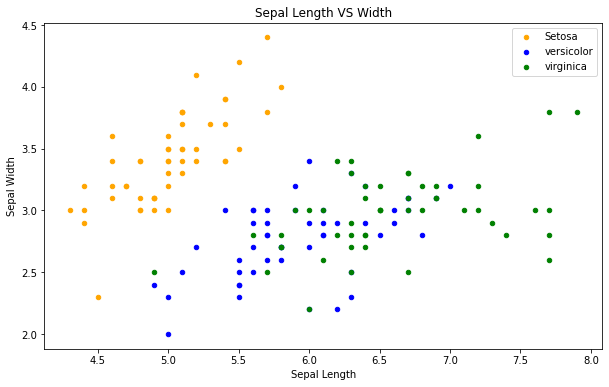

In [7]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

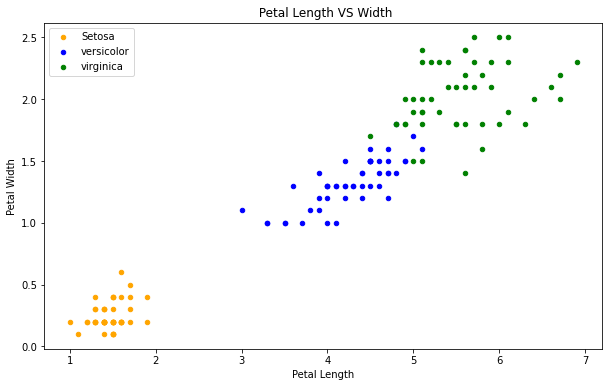

In [8]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [9]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

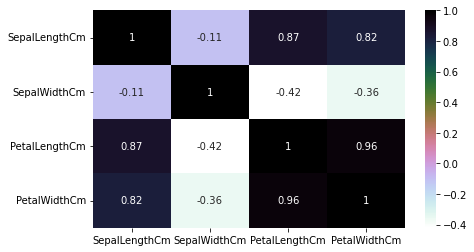

In [10]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [11]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [13]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [14]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
79,5.7,2.6,3.5,1.0
19,5.1,3.8,1.5,0.3


In [15]:
train_y

79     Iris-versicolor
19         Iris-setosa
10         Iris-setosa
128     Iris-virginica
30         Iris-setosa
            ...       
107     Iris-virginica
95     Iris-versicolor
119     Iris-virginica
133     Iris-virginica
8          Iris-setosa
Name: Species, Length: 105, dtype: object

In [16]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,5.7,2.9,4.2,1.3
144,6.7,3.3,5.7,2.5


In [17]:
model_svc = svm.SVC() #select the algorithm
model_svc.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model_svc.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


In [18]:
type(train_X)

pandas.core.frame.DataFrame

In [19]:
type(prediction)

numpy.ndarray

In [20]:
prediction

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
model_lr = LogisticRegression()
model_lr.fit(train_X,train_y)
prediction=model_lr.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


In [22]:
model_dt=DecisionTreeClassifier()
model_dt.fit(train_X,train_y)
prediction=model_dt.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


In [23]:
model_knn=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model_knn.fit(train_X,train_y)
prediction=model_knn.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


In [24]:
from joblib import dump, load

In [25]:
dump(model_svc,os.path.join(base_path,'model_svc.joblib'))
dump(model_lr, os.path.join(base_path,'model_lr.joblib'))
dump(model_dt, os.path.join(base_path,'model_dt.joblib'))
dump(model_knn, os.path.join(base_path,'model_knn.joblib'))

['C:\\Users\\ngoun\\OneDrive\\teach_courses\\cours_python\\python_dsi\\cours_python_dsi\\DSI10\\model_knn.joblib']

In [26]:
model_svc_l = load(os.path.join(base_path,'model_svc.joblib'))

In [27]:
# 5.1	3.5	1.4	0.2	Iris-setosa
# 4.9	3.0	1.4	0.2	Iris-setosa
# 147	6.3	2.5	5.0	1.9	Iris-virginica
data_sample = {'SepalLengthCm': [5.1, 4.9, 147], 'SepalWidthCm': [3.5, 3.0, 6.3], 'PetalLengthCm': [1.4, 1.4, 1.4], 'PetalWidthCm': [0.2, 0.2, 1.9]} #SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm
pd_sample = pd.DataFrame.from_dict(data_sample)
pd_sample.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,147.0,6.3,1.4,1.9


In [28]:
test_predict = model_svc_l.predict(pd_sample)
test_predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [29]:
test_predict[0]

'Iris-setosa'